# News articles classification


News articles are one of the richest sources of data for many businesses. ABC company wants 
to build a website and recommend the contents to its users on their web application. So any new
article or content is coming they wants to classify that into under one of 5 categories: business, 
entertainment, politics, sport or tech. As an ML engineer you are required to use a public dataset 
from the BBC each labelled under one of 5 categories: business, entertainment, politics, sport or 
tech.
The goal will be to build a system that can accurately classify previously unseen news articles 
into the right category.
The Evaluation metric you should use is the accuracy. 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Susanna.Malayil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Susanna.Malayil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Susanna.Malayil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Susanna.Malayil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
#storing the dataset to a dataframe named 'data'
data=pd.read_csv('BBC News Train.csv')

In [3]:
#displaying the first few rows
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
data.shape

(1490, 3)

There are 1490 observations and 3 features in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
#to find the count of each label
data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

There are five classes and are almost balanced.

## Preprocessing 

In [7]:
#encoding the dependent feature
data['Category']=data['Category'].map({'sport':0,'business':1,'politics':2,'entertainment':3,'tech':4})
data['Category'].value_counts()

0    346
1    336
2    274
3    273
4    261
Name: Category, dtype: int64

In [8]:
#defining a few functions to clean the text
#to convert text to lower case
def lower_case(text):
  return text.lower()

#to remove special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\^^", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    return text

#to correct spellings
from autocorrect import Speller
spell=Speller(lang='en')
from nltk.tokenize import word_tokenize
def correct_spell(text):
  sent_corr=''.join([spell(word) for word in word_tokenize(text)])
  return sent_corr

#lemmatizing the text
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatize(text):
    lemma=WordNetLemmatizer()
    text= ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

#to remove stopwords
#Setting English stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
stopword_list=nltk.corpus.stopwords.words('english')
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_text = ' '.join([token for token in tokens if token not in stopword_list])   
    return filtered_text

In [9]:
#applying the cleaning functions 
data['Text']=data['Text'].apply(lower_case)
data['Text']=data['Text'].apply(remove_special_characters)
#data['Text']=data['Text'].apply(correct_spell)
data['Text']=data['Text'].apply(lemmatize)
data['Text']=data['Text'].apply(remove_stopwords)

In [10]:
# instantiate a tf-idf vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,2), max_features=400).fit(data.Text)
X=vect.transform(data['Text'])
# create a dataframe to check the document-term matrix using tf-idf values
Text_transformed = pd.DataFrame(X.toarray(),columns=vect.get_feature_names_out())
Text_transformed

,000,10,100,12,20,2003,2004,2005,able,access,...,week,went,williams,win,winner,woman,work,working,world,year
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.097100,0.000000,0.000000,0.0,...,0.084265,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.054470
1,0.000000,0.072852,0.0,0.000000,0.000000,0.077802,0.141668,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.039736
2,0.038629,0.000000,0.0,0.000000,0.000000,0.000000,0.083856,0.092559,0.000000,0.0,...,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.307952,0.023520
3,0.025610,0.000000,0.0,0.000000,0.000000,0.061064,0.000000,0.000000,0.031972,0.0,...,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.015594
4,0.000000,0.082339,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.069476,0.092917,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.044910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.104205,0.000000,0.0,0.273268,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.11055,0.308733,0.0,0.0,0.0,0.000000,0.000000
1486,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.034785,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.022485
1487,0.000000,0.000000,0.0,0.104458,0.000000,0.189953,0.259411,0.095444,0.000000,0.0,...,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.291041
1488,0.000000,0.076864,0.0,0.045141,0.000000,0.000000,0.074735,0.041246,0.000000,0.0,...,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.020962


## Modelling

In [11]:
#dependent variable is stored in y
y=data['Category']
#independent variable is stored in x
x=Text_transformed

In [12]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg_model=log_reg.fit(x_train,y_train)
log_pred=log_reg_model.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
log_acc=accuracy_score(y_test,log_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 73  2  0  0]
 [ 0  3 52  0  1]
 [ 1  1  1 43  0]
 [ 2  0  1  0 55]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       0.95      0.97      0.96        75
           2       0.93      0.93      0.93        56
           3       1.00      0.93      0.97        46
           4       0.98      0.95      0.96        58

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



### K-Nearest Neighours

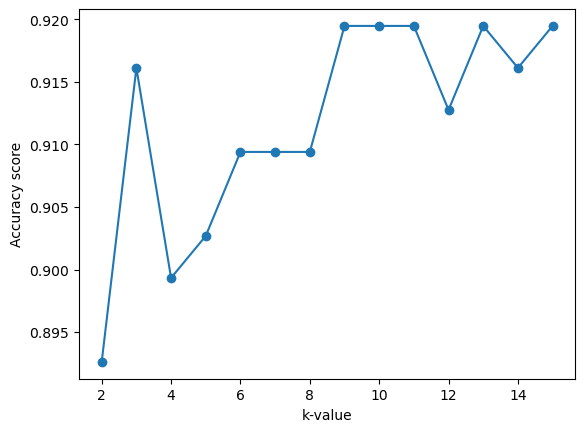

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_matrix=[]
neighbours=np.arange(2,16)

for k in neighbours:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn_model=knn.fit(x_train,y_train)
    knn_model_pred=knn_model.predict(x_test)
    acc=accuracy_score(y_test,knn_model_pred)
    acc_matrix.append(acc)

plt.plot(neighbours,acc_matrix,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy score')
plt.show()

In [15]:
knn=KNeighborsClassifier(n_neighbors=9)
knn_model=knn.fit(x_train,y_train)
knn_model_pred=knn_model.predict(x_test)
knn_acc=accuracy_score(y_test,knn_model_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,knn_model_pred))
print(classification_report(y_test,knn_model_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 68  1  4  2]
 [ 1  3 51  0  1]
 [ 1  0  2 43  0]
 [ 2  2  3  2 49]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        63
           1       0.93      0.91      0.92        75
           2       0.89      0.91      0.90        56
           3       0.88      0.93      0.91        46
           4       0.94      0.84      0.89        58

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



### Support Vector Machine

In [16]:
from sklearn.svm import SVC
#linear kernel
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
svm_acc=accuracy_score(y_test,svm_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 73  2  0  0]
 [ 0  3 52  1  0]
 [ 1  1  0 44  0]
 [ 1  0  1  0 56]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       0.95      0.97      0.96        75
           2       0.95      0.93      0.94        56
           3       0.98      0.96      0.97        46
           4       1.00      0.97      0.98        58

    accuracy                           0.97       298
   macro avg       0.97      0.96      0.97       298
weighted avg       0.97      0.97      0.97       298



### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)
dt_acc=accuracy_score(y_test,dt_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 73  2  0  0]
 [ 0  3 52  1  0]
 [ 1  1  0 44  0]
 [ 1  0  1  0 56]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       0.95      0.97      0.96        75
           2       0.95      0.93      0.94        56
           3       0.98      0.96      0.97        46
           4       1.00      0.97      0.98        58

    accuracy                           0.97       298
   macro avg       0.97      0.96      0.97       298
weighted avg       0.97      0.97      0.97       298



### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb_model=nb.fit(x_train, y_train)  
nb_pred=nb_model.predict(x_test)
nb_acc=accuracy_score(y_test,nb_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))

Confusion matrix is: 
 [[60  1  0  2  0]
 [ 0 65  2  3  5]
 [ 0  3 53  0  0]
 [ 0  0  0 43  3]
 [ 0  1  3  0 54]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       0.93      0.87      0.90        75
           2       0.91      0.95      0.93        56
           3       0.90      0.93      0.91        46
           4       0.87      0.93      0.90        58

    accuracy                           0.92       298
   macro avg       0.92      0.93      0.92       298
weighted avg       0.92      0.92      0.92       298



### Gradient Boost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb_model=gb.fit(x_train,y_train)
gb_pred=gb_model.predict(x_test)
gb_acc=accuracy_score(y_test,gb_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 71  3  0  1]
 [ 0  1 55  0  0]
 [ 1  0  0 44  1]
 [ 0  2  0  1 55]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       0.96      0.95      0.95        75
           2       0.95      0.98      0.96        56
           3       0.98      0.96      0.97        46
           4       0.96      0.95      0.96        58

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



### XGBoost

In [20]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb_model=xgb.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)
xgb_acc=accuracy_score(y_test,xgb_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 72  2  0  1]
 [ 0  2 54  0  0]
 [ 1  0  0 45  0]
 [ 1  1  0  1 55]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       0.96      0.96      0.96        75
           2       0.96      0.96      0.96        56
           3       0.98      0.98      0.98        46
           4       0.98      0.95      0.96        58

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



### AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb_model=adb.fit(x_train,y_train)
adb_pred=adb_model.predict(x_test)
adb_acc=accuracy_score(y_test,adb_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,adb_pred))
print(classification_report(y_test,adb_pred))

Confusion matrix is: 
 [[61  0  1  1  0]
 [ 5 59  7  3  1]
 [ 2  8 45  0  1]
 [ 3  1  0 41  1]
 [ 4 11  0  1 42]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        63
           1       0.75      0.79      0.77        75
           2       0.85      0.80      0.83        56
           3       0.89      0.89      0.89        46
           4       0.93      0.72      0.82        58

    accuracy                           0.83       298
   macro avg       0.85      0.83      0.84       298
weighted avg       0.84      0.83      0.83       298



### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
rf_acc=accuracy_score(y_test,rf_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 72  2  0  1]
 [ 0  1 55  0  0]
 [ 0  0  0 46  0]
 [ 0  0  1  1 56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.99      0.96      0.97        75
           2       0.95      0.98      0.96        56
           3       0.98      1.00      0.99        46
           4       0.98      0.97      0.97        58

    accuracy                           0.98       298
   macro avg       0.98      0.98      0.98       298
weighted avg       0.98      0.98      0.98       298



### MLP

In [23]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=10)
mlp_model=mlp.fit(x_train,y_train)
mlp_pred=mlp_model.predict(x_test)
mlp_acc=accuracy_score(y_test,mlp_pred)
print('Confusion matrix is: \n', confusion_matrix(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))

Confusion matrix is: 
 [[63  0  0  0  0]
 [ 0 74  1  0  0]
 [ 1  1 53  1  0]
 [ 1  1  1 43  0]
 [ 1  0  1  0 56]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       0.97      0.99      0.98        75
           2       0.95      0.95      0.95        56
           3       0.98      0.93      0.96        46
           4       1.00      0.97      0.98        58

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



# Summary

In [24]:
print('Accuracy for different models:\n')
print('Logistic Regression : {:.2%}'.format(log_acc))
print('K Nearest Neighbours : {:.2%}'.format(knn_acc))
print('Support Vector Machine : {:.2%}'.format(svm_acc))
print('Naive Bayes : {:.2%}'.format(nb_acc))
print('Gradient Boost : {:.2%}'.format(gb_acc))
print('XGBoost : {:.2%}'.format(xgb_acc))
print('AdaBoost : {:.2%}'.format(adb_acc))
print('Random Forest : {:.2%}'.format(rf_acc))
print('MLP : {:.2%}'.format(mlp_acc))

Accuracy for different models:

Logistic Regression : 95.97%
K Nearest Neighbours : 91.95%
Support Vector Machine : 96.64%
Naive Bayes : 92.28%
Gradient Boost : 96.64%
XGBoost : 96.98%
AdaBoost : 83.22%
Random Forest : 97.99%
MLP : 96.98%
